In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 28s - loss: 0.0352
Epoch 2/20
35/35 - 4s - loss: 0.0118
Epoch 3/20
35/35 - 4s - loss: 0.0092
Epoch 4/20
35/35 - 4s - loss: 0.0106
Epoch 5/20
35/35 - 4s - loss: 0.0085
Epoch 6/20
35/35 - 4s - loss: 0.0085
Epoch 7/20
35/35 - 4s - loss: 0.0068
Epoch 8/20
35/35 - 4s - loss: 0.0066
Epoch 9/20
35/35 - 4s - loss: 0.0059
Epoch 10/20
35/35 - 4s - loss: 0.0060
Epoch 11/20
35/35 - 4s - loss: 0.0065
Epoch 12/20
35/35 - 4s - loss: 0.0057
Epoch 13/20
35/35 - 3s - loss: 0.0056
Epoch 14/20
35/35 - 3s - loss: 0.0054
Epoch 15/20
35/35 - 4s - loss: 0.0050
Epoch 16/20
35/35 - 3s - loss: 0.0054
Epoch 17/20
35/35 - 3s - loss: 0.0058
Epoch 18/20
35/35 - 3s - loss: 0.0048
Epoch 19/20
35/35 - 4s - loss: 0.0046
Epoch 20/20
35/35 - 4s - loss: 0.0043


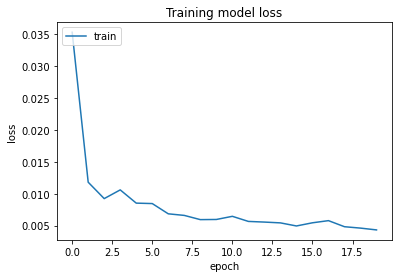

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [14]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

array([[1.1830164],
       [1.1871499],
       [1.1997811],
       [1.2182366],
       [1.2330647],
       [1.233163 ],
       [1.2187632],
       [1.1985604],
       [1.1850642],
       [1.1812156],
       [1.1748347],
       [1.164055 ],
       [1.1542344],
       [1.145249 ],
       [1.1436538],
       [1.1490449],
       [1.1684369],
       [1.1988162],
       [1.23338  ],
       [1.267155 ],
       [1.2804679],
       [1.2754915],
       [1.2518723],
       [1.2187912],
       [1.1892012],
       [1.1725777],
       [1.16934  ],
       [1.170675 ],
       [1.1655117],
       [1.1558385],
       [1.1443266],
       [1.1308275],
       [1.1104199],
       [1.0849782],
       [1.0743785],
       [1.0845392],
       [1.108477 ],
       [1.1360447],
       [1.1618378],
       [1.1749014],
       [1.18672  ],
       [1.2007747],
       [1.2173952],
       [1.2330617],
       [1.2434353],
       [1.2438468],
       [1.2324322],
       [1.2216827],
       [1.2181102],
       [1.2239071],


In [16]:
predicted_price = sc.inverse_transform(y_pred)

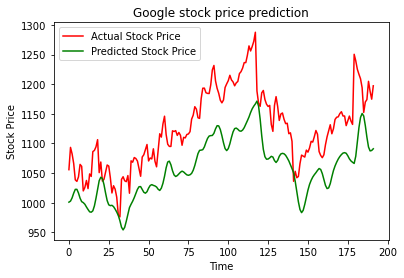

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()